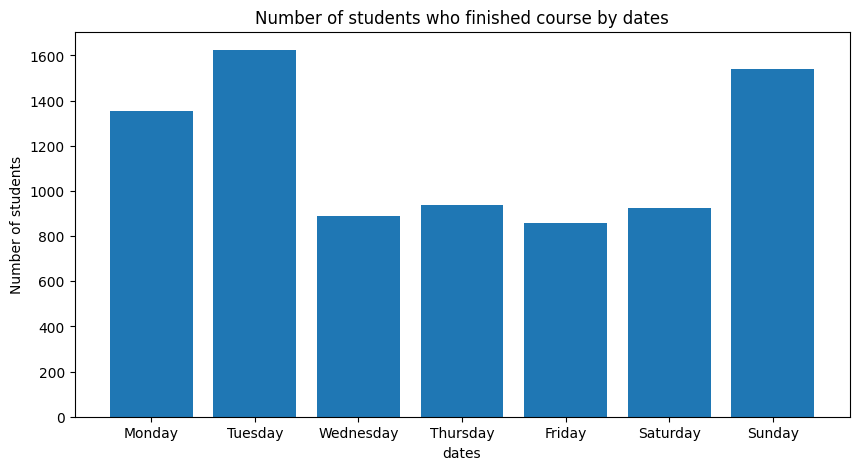

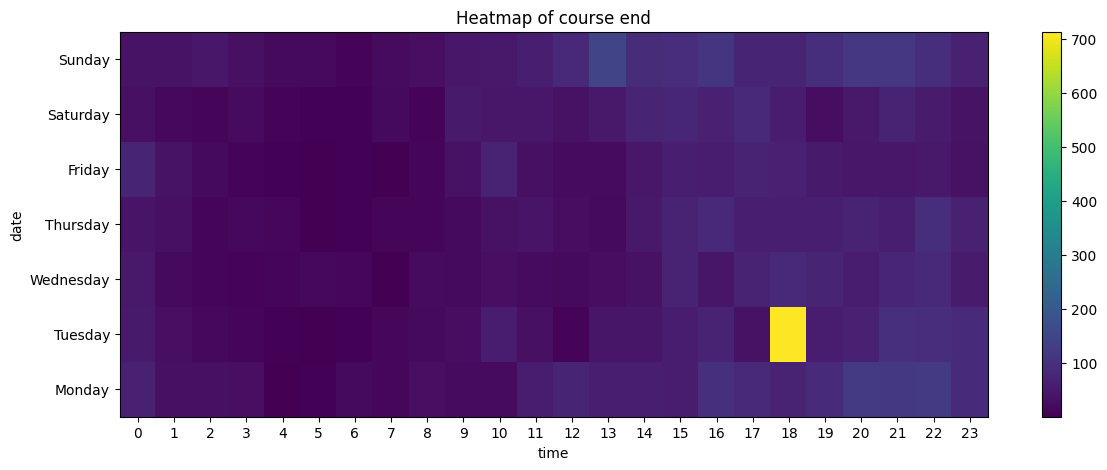

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

done_data = pd.read_table('/content/done_detail.csv', sep = ',')
format='%Y-%m-%dT%H:%M:%S.%f'
done_data['done_date'] = pd.to_datetime(done_data['done_date'], format=format)
done_data['done_date_time_weekday'] = done_data['done_date'].dt.day_name()
weeks = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdata = done_data.groupby('done_date_time_weekday')['user_id'].count()
weekdata = weekdata.agg(weeks)
weekdata

done_data['done_date_time_hour'] = done_data['done_date'].dt.hour
hourdata = done_data.groupby('done_date_time_hour')['user_id'].count()
hourdata = hourdata.sort_index()
hourdata
plt.figure(figsize=(10,5))
plt.bar(weekdata.index, weekdata)
plt.title('Number of students who finished course by dates')
plt.xlabel('dates')
plt.ylabel('Number of students')
plt.xticks(rotation=0)
plt.show()

done_data_pivot_table = pd.pivot_table(done_data, values='user_id',
                                       index= ['done_date_time_weekday'],
                                       columns = ['done_date_time_hour'],
                                       aggfunc='count').agg(weeks)
done_data_pivot_table
plt.figure(figsize=(14,5))
plt.pcolor(done_data_pivot_table)
plt.xticks(np.arange(0.5, len(done_data_pivot_table.columns), 1), done_data_pivot_table.columns)
plt.yticks(np.arange(0.5, len(done_data_pivot_table.index), 1), done_data_pivot_table.index)
plt.title('Heatmap of course end')
plt.xlabel('time')
plt.ylabel('date')

plt.colorbar()
plt.show()
